In [2]:
#Logistic regression works by first looking for linear decision boundaries between the samples of different classes. Then the logistic function 
#is used to get the probability of belongingness to each class defined with respect to the decision boundaries.
# Logistic function is defined as sigma(s)=1/1+e(raise to -x)


In [3]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

#Prepare data:The data has 4 input-features and 3 output-classes. For simplicity we will use only two features: sepal-length and sepal-width (both in cm) and two output classes: Iris Setosa and Iris Versicolour.
iris = datasets.load_iris()
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target
#The first 50 samples are class 0 and the next 50 samples are class 1

X = X[:100]
Y = Y[:100]
number_of_samples = len(Y)

# Print the first 5 samples
print("First 5 samples:")
print("X:")
print(X[:5])
print("Y:")
print(Y[:5])

number_of_samples = len(Y)


First 5 samples:
X:
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
Y:
[0 0 0 0 0]


In [4]:
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
print(random_indices)


[39 48 55 32 45 18 23 46 66 36 93 26  6 38 47 30 92 61 41 75 11  9 77 59
 12 15 85 56 20 28 98 89 80 76 34 57 81 21 49 33 87 99 54 72 68  5 44  4
 97 88 96 14 35 63  2 42 51 70 17 58 60 84 83 94 79  3 13  8 78 37 69 62
 90 25 43 22 86 50 73 64 82  0 19 65 31 53 74 10 95 24  1 16 91 67 29 52
 40 27 71  7]


In [5]:
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]

In [6]:
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]


In [7]:
# Print the first 5 samples of the training set
print("First 5 samples of the training set:")
print("x_train:")
print(x_train[:5])
print("y_train:")
print(y_train[:5])

# Print the first 5 samples of the validation set
print("\nFirst 5 samples of the validation set:")
print("x_val:")
print(x_val[:5])
print("y_val:")
print(y_val[:5])

# Print the first 5 samples of the test set
print("\nFirst 5 samples of the test set:")
print("x_test:")
print(x_test[:5])
print("y_test:")
print(y_test[:5])

First 5 samples of the training set:
x_train:
[[5.1 3.4]
 [5.3 3.7]
 [5.7 2.8]
 [5.2 4.1]
 [4.8 3. ]]
y_train:
[0 0 1 0 0]

First 5 samples of the validation set:
x_val:
[[5.6 2.5]
 [6.  2.2]
 [5.5 2.6]
 [5.  3. ]
 [5.  3.5]]
y_val:
[1 1 1 0 0]

First 5 samples of the test set:
x_test:
[[5.5 2.3]
 [6.4 2.9]
 [5.4 3.7]
 [5.7 3. ]
 [4.8 3.4]]
y_test:
[1 1 0 1 0]


In [8]:
#Visualizing the training data
#Class 0 Visualization:
X_class0 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i] == 0])
Y_class0 = np.zeros((X_class0.shape[0]), dtype=int)
#Class 1 Visualization:
X_class1 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i] == 1])
Y_class1 = np.ones((X_class1.shape[0]), dtype=int)

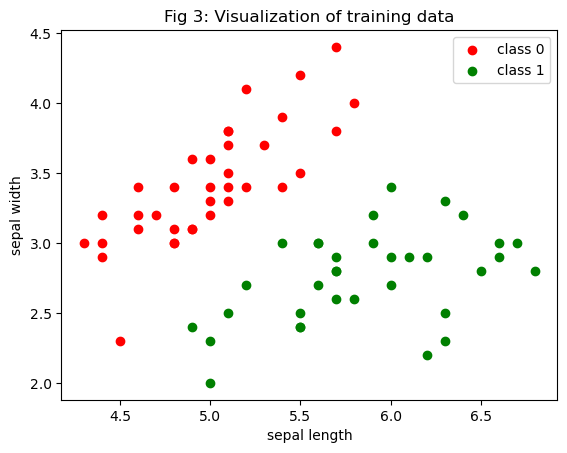

In [19]:
plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='green')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title('Fig 3: Visualization of training data')
plt.show()

In [20]:
#Fit logistic regression model
model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
full_X = np.concatenate((X_class0,X_class1),axis=0)
full_Y = np.concatenate((Y_class0,Y_class1),axis=0)
model.fit(full_X,full_Y)

LogisticRegression(C=100000.0)

In [21]:
# Display the decision boundary
#(Visualization code taken from: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = full_X[:, 0].min() - .5, full_X[:, 0].max() + .5
y_min, y_max = full_X[:, 1].min() - .5, full_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict for the entire mesh to find the regions for each class in the feature space



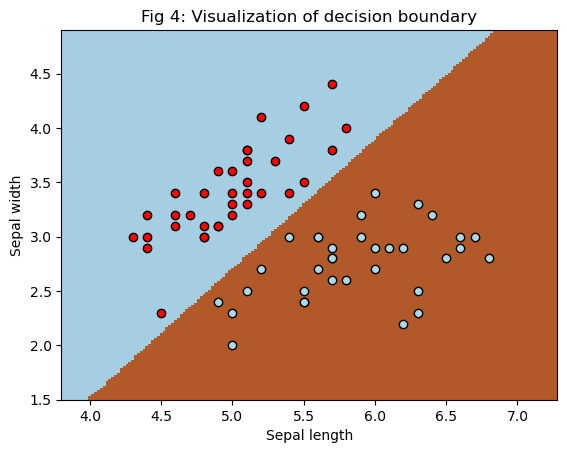

In [24]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X_class0[:, 0], X_class0[:, 1], color='red', edgecolors='k')
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='lightblue', edgecolors='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

In [28]:
#Evaluate the model
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%')


validation misclassification percentage = 0.0 %
test misclassification percentage = 0.0 %


In [ ]:
#Zero misclassification error was possible only because the two classes were linearly separable in the chosen feature space. However this is seldom the case in most real-world classification problems.